# Interview Prep
This notebook is intended to serve as a practice for implementing fundamental machine learning methods. In this notebook the following will be practiced:
- KNN
- Linear Regression
- Logistic Regression
- Decision Trees
- Random Forests
- Naive Bayes
- PCA
- Perceptron
- SVM
- K-Means

In [9]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt

def accuracy(predictions, labels):
    return sum(predictions==labels)/len(labels)

def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

## KNN

In [4]:
def euc_distance(x1, x2):
    sqrd_dist = (x1-x2)**2
    return np.sqrt(np.sum(sqrd_dist))

class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._pred(x) for x in X]
        
        return predictions
    
    def _pred(self, x):
        # calculate distances
        distances = [euc_distance(x, x_train) for x_train in self.X_train]

        # sort distances
        sorted_idxs = np.argsort(distances)

        # pick top k and vote
        top_k_idxs = sorted_idxs[:self.k]
        y_preds = self.y_train[top_k_idxs]
        votes = Counter(y_preds)

        return votes.most_common(1)[0][0]

In [5]:
dataset = datasets.load_iris()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [6]:
cfr = KNN()
cfr.fit(X_train,y_train)
predictions = cfr.predict(X_test)

accuracy(predictions, y_test)

0.9666666666666667

## Linear Regression

In [14]:
class LinearRegression:
    def __init__(self, lr=0.01, max_iters=300):
        self.lr = lr
        self.max_iters = max_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # train for max_iters times
        for _ in range(self.max_iters):
            y_pred = np.dot(X, self.weights) + self.bias # x@w + b (n_samples X n_features) . (n_features, 1) + b --> (n_samples, 1)

            dw = (1/n_samples) * (np.dot(X.T, (y_pred - y)))
            db = (1/n_samples) * np.sum((y_pred - y))

            self.weights -= dw * self.lr
            self.bias -= db * self.lr

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [11]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

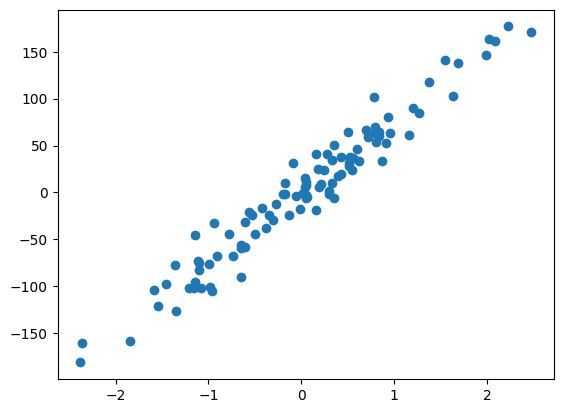

In [12]:
plt.scatter(X[:,0], y)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse(y_test, predictions)

199.6232976004053

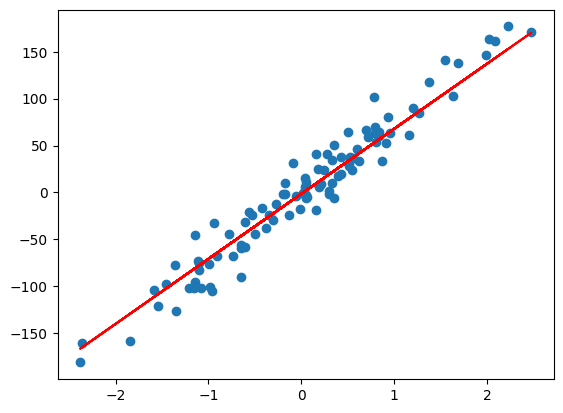

In [17]:
plt.plot(X, model.predict(X), 'r')
plt.scatter(X,y)

## Logistic Regression

In [27]:
def sigmoid(x):
    return (1/(1-np.exp(-x)))
class LogisticRegression:
    def __init__(self, lr=0.01, max_iters=300):
        self.lr = lr
        self.max_iters = max_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.max_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum((y_pred - y))

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_predictions = [0 if y < 0.5 else 1 for y in y_pred]

        return class_predictions

In [28]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy(y_pred, y_test)

/var/folders/x8/7bz9rrcn6yd907c01wdbgcv40000gn/T/ipykernel_51940/1609611936.py:2: RuntimeWarning: divide by zero encountered in divide
  return (1/(1-np.exp(-x)))


0.6228070175438597